# Circuits and Gates

This notebook will guide you through the basics of quantum computing by exploring quantum circuits, quantum gates and everything else you need to get started with quantum development.

In [3]:
# imports

from qiskit import *

## Quantum Circuits

A <b>quantum circuit</b> is a visual representation of operations done on one or more <b>qubits</b> (quantum bits), which are used to store and process information in quantum computer (akin to bits in classical computers). The classical equivalent of a quantum circuit would simply be a computer program.

Qubits are the fundamental unit of information in quantum computing systems, and they can exist in a superposition of states (existing in multiple states simultaneously), allowing quantum computers to explore multiple possibilities, solutions and pathways simultaneously. In contrast, a classical bit can only exist in one of two states; either `0` or `1`. A qubit can be represented as either `|0⟩` or `|1⟩` (Dirac notation).

Qubits can be manipulated by <b>quantum gates</b>, just like how Boolean <b>logic gates</b> manipulate bits in classical computers. An example for quantum gates is the `X` gate, which corresponds to the `NOT` gate in Boolean logic.

Qubits are represented as 'wires' on quantum circuits. Quantum gates are applied to qubits by placing the gates on their respective wires.

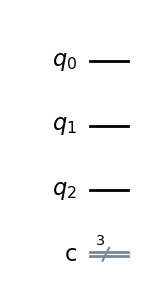

In [30]:
# create a quantum circuit with 3 qubits and 3 classical bits

circuit_1 = QuantumCircuit(3, 3)

# visualize the circuit
%matplotlib inline
circuit_1.draw(output='mpl')

<b>Measurements</b> are used to obtain classical information from a quantum circuit. They work by collapsing the quantum state of a qubit into one of its <b>basis states</b> (either `|0⟩` or `|1⟩`, which correspond to `0` and `1` in classical computing).

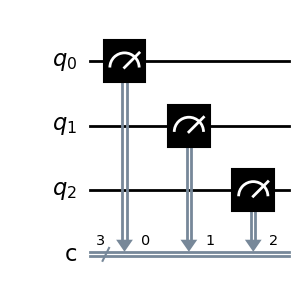

In [31]:
# get measurements from qubits 0, 1 and 2 to classical bits 0, 1 and 2

circuit_1.measure([0, 1, 2], [0, 1, 2])

%matplotlib inline
circuit_1.draw(output='mpl')

We can use a <b>quantum simulator</b> to run our circuit locally on our machine, instead of running it on IBM's quantum hardware.

For this, we can use Qiskit's built-in simulator <i>Aer</i> to create a simulator object.

In [17]:
# set up simulator to run circuit

from qiskit.providers.aer import AerSimulator

simulator = AerSimulator()

# or you can use

from qiskit import Aer
simulator = Aer.get_backend('aer_simulator')

To execute our quantum circuit, we can run it on the simulator we created.

In [32]:
# run circuit on simulator

job = simulator.run(circuit_1)
result = job.result()
result.get_counts()

{'000': 1024}

The `get_counts()` method of the `result` objects returns a dictionary with the counts of different outcomes (outputs) made by the circuit when it was run.

Each key in the dictionary is an outcome of running the circuit, while the corresponding value shows how many times the outcome was observed.

In the above case, we have not applied any quantum gates on the qubits, and by convention, qubits start off at the state `|0⟩`. Thus, we can only observe `'000'` (for each of the 3 qubits on the quantum circuit). This measurement was made 1024 times, since the simulator object gets executed 1024 times by default, i.e. the circuit has run 1024 times, and all 1024 times it has provided the outcome of `'000'`.

## The X Gate

The `X` gate is the quantum equivalent of the `NOT`gate in Boolean logic. It flips the quantum state of a qubit. This is really useful in encoding information using quantum circuit. To see how this works, let's see how `X` gates can be used to encode `011` using qubits.

In [11]:
# create new quantum circuit with 3 qubits and 3 classical bits

circuit_2 = QuantumCircuit(3, 3)

Let's add `X` gates to the first two qubits to switch their state from `|0⟩` to `|1⟩`.

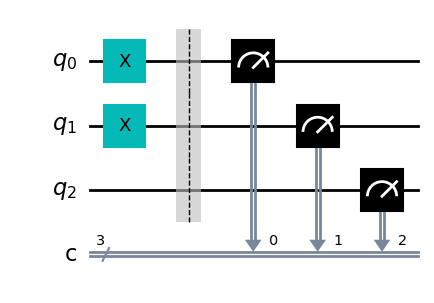

In [12]:
# adding X gates to first 2 qubits

circuit_2.x([0, 1])

# adding a barrier (to separate the X gates from the measurement)

circuit_2.barrier()

# adding measurements

circuit_2.measure([0, 1, 2], [0, 1, 2])

%matplotlib inline
circuit_2.draw(output='mpl')

Finally, we can run this circuit to see what its output looks like.

In [35]:
# run the circuit on the simulator

job = simulator.run(circuit_2)
result = job.result()
result.get_counts()

{'011': 1024}

## The CNOT Gate

The `CNOT` (Controlled-NOT) or `CX` gate is the quantum equivalent of the `XOR` gate in classical computing. The `CX` gate is a two-qubit gate; it takes in two qubits as inputs, namely the <b>control</b> qubit and the <b>target</b> qubit. The easiest way to remember how the `CX` gate works is:

> <i>When the control is 1, the result is the complement of the target.</i>
> 
> <i>Else, the result is the target.</i>

This is illustrated in the tables given below:

| Control | Target | Result |
| ------- | ------ | ------ |
| 0       | 0      | 0      |
| 0       | 1      | 1      |
| 1       | 0      | 1      |
| 1       | 1      | 0      |

| Target | Control | Result |
| ------ | ------- | ------ |
| 0      | 0       | 0      |
| 0      | 1       | 1      |
| 1      | 0       | 1      |
| 1      | 1       | 0      |

Notice the similarity between these tables and the truth table for the `XOR` gate:

| A (Input 1) | B (Input 2) | A XOR B |
| ------- | ------ | ------ |
| 0       | 0      | 0      |
| 0       | 1      | 1      |
| 1       | 0      | 1      |
| 1       | 1      | 0      |